In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import SGD,Adam

In [0]:
(trainX, trainy), (testX, testy) = mnist.load_data()

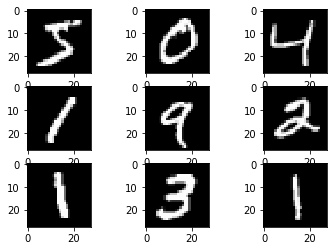

In [3]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(trainX[i], cmap='gray')
plt.show()

In [0]:
## Add color channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [0]:
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [6]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28, 1), y=(60000, 10)
Test: X=(10000, 28, 28, 1), y=(10000, 10)


In [0]:
# convert from integers to floats
train_normX = trainX.astype('float32')
test_normX = testX.astype('float32')
# normalize to range 0-1
train_normX = train_normX / 255.0
test_normX = test_normX / 255.0

In [0]:
##Defining Model

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
model.add(Dense(50,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [0]:
opt = Adam(lr=0.001)

In [0]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               921700    
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)              

In [47]:
from keras import backend as K
K.image_data_format()

'channels_last'

In [48]:
hist = model.fit(train_normX, trainy, epochs = 10, batch_size=64, validation_data=(test_normX,testy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.2347 - acc: 0.9296 - val_loss: 0.0587 - val_acc: 0.9811
Epoch 2/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0791 - acc: 0.9766 - val_loss: 0.0414 - val_acc: 0.9867
Epoch 3/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0593 - acc: 0.9824 - val_loss: 0.0413 - val_acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0477 - acc: 0.9856 - val_loss: 0.0404 - val_acc: 0.9884
Epoch 5/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0386 - acc: 0.9874 - val_loss: 0.0385 - val_acc: 0.9880
Epoch 6/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0353 - acc: 0.9885 - val_loss: 0.0392 - val_acc: 0.9889
Epoch 7/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0301 - acc: 0.9905 - val_loss: 0.0377 - 

In [0]:
hist = hist.history

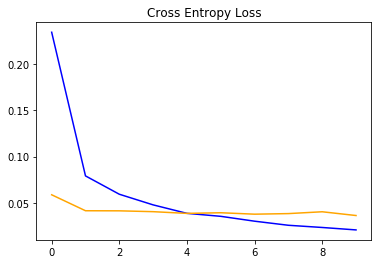

In [50]:
# plot loss
plt.title('Cross Entropy Loss')
plt.plot(hist['loss'], color='blue', label='train')
plt.plot(hist['val_loss'], color='orange', label='test')

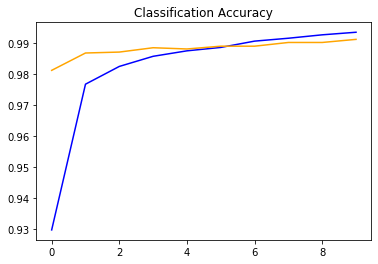

In [51]:
# plot accuracy
plt.title('Classification Accuracy')
plt.plot(hist['acc'], color='blue', label='train')
plt.plot(hist['val_acc'], color='orange', label='test')

In [0]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

def load_image(img):
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	img = img.astype('float32')
	img = img / 255.0
	return img

def run_example(image_name):
	img = load_image(image_name)
	digit = model.predict_classes(img)
	print(digit[0])

In [0]:
url = 'http://clipart-library.com/img1/188866.png'
from matplotlib.image import imread
img = imread(url)

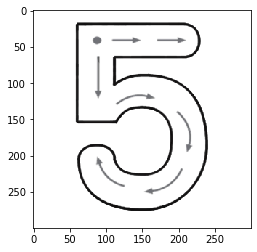

In [54]:
plt.imshow(img)

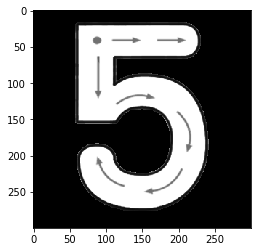

In [55]:
import cv2
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img,cmap='gray')

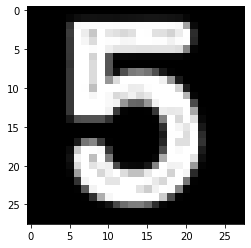

In [56]:
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
plt.imshow(img,cmap='gray')

In [57]:
img.shape

(28, 28)

In [58]:
run_example(img)

1


## https://keras.io/examples/mnist_cnn/

In [24]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 95us/step - loss: 0.2685 - acc: 0.9156 - val_loss: 0.0556 - val_acc: 0.9824
Epoch 2/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0882 - acc: 0.9733 - val_loss: 0.0448 - val_acc: 0.9850
Epoch 3/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0647 - acc: 0.9809 - val_loss: 0.0325 - val_acc: 0.9884
Epoch 4/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0549 - acc: 0.9832 - val_loss: 0.0332 - val_acc: 0.9886
Epoch 5/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0467 - acc: 0.9854 - val_loss: 0.0292 - val_acc: 0.9900
Epoch 6/12
60000/60000 [==============================] - 5s 83us/step - los